# ML-4. Валидация данных и оценка модели 

## 


In [4]:
from sklearn import model_selection


X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, train_size=0.65,test_size=0.35, random_state=101
)

NameError: name 'X' is not defined

In [9]:
import numpy as np
from sklearn.model_selection import KFold 
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) 
y = np.array([1, 2, 3, 4]) 
kf = KFold(n_splits=2)  #реализация разбиения

display(
kf.get_n_splits(X), #возвращает количество разбиений


list(kf.split(X)), #возвращает индексы для разбиения
)


2

[(array([2, 3]), array([0, 1])), (array([0, 1]), array([2, 3]))]

### Задание 4.3.1

Загрузите данные train.csv, разделите выборку на обучающую и тестовую части в соотношении 70% на 30% без перемешивания. Найдите среднее значение для признака payment_amount и запишите его в переменную result. Обратите внимание, что среднее нужно считать по тестовой выборке.

In [32]:
import pandas as pd 
from sklearn.model_selection import train_test_split
vis_data = pd.read_csv("./datasets/ml-4/train.csv", encoding = 'ISO-8859-1', low_memory = False)
# Напишите ваш код ниже

train, test = train_test_split(vis_data, test_size=0.3, shuffle=False)

result = test['payment_amount'].mean()


34.13839024130401

### Задание 7.4.5

0.0/1.0 point (graded)
Допустим, у вас есть выборки y_true = [1.23, 2.35, 2.75] и y_pred = [1.01, 12.3, 2.74]. Посчитайте метрику RMSE, округлите до сотых и запишите результат. Например, 3.14

In [34]:
y_true = [1.23, 2.35, 2.75]
y_pred = [1.01, 12.3, 2.74]

In [37]:
from sklearn.metrics import mean_squared_error


round(mean_squared_error(y_true, y_pred, squared=False), 2)

5.75

### Задание 4.5.1
0.0/3.0 points (graded)
Загрузите данные train.csv, оставьте в данных только признаки 'fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due', затем избавьтесь от пропусков. Целевой переменной будет 'balance_due', разделите данные на обучающую и тестовую выборки в соотношении 70% на 30% без перемешивания. Обучите линейную регрессию из scikit-learn и запишите в переменную result значение метрики RMSE на тестовой выборке.

Примечание: RMSE означает Rooted Mean Squared Error. Rooted означает, что из значения метрики был взят корень.

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
vis_data = pd.read_csv("./datasets/ml-4/train.csv", encoding = 'ISO-8859-1', low_memory = False)
# Напишите ваш код ниже

In [85]:
data = vis_data[['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due']].dropna()
X = data[['fine_amount', 'state_fee', 'late_fee', 'discount_amount']]
y = data['balance_due']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
clf = LinearRegression() 
clf.fit(X_train, y_train) 

result = np.sqrt(mean_squared_error(y_test, clf.predict(X_test)))
display(result)



# Решение от автора:
vis_data_small = vis_data[['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due']].dropna()
X = vis_data_small[['fine_amount', 'state_fee', 'late_fee', 'discount_amount']]
y = vis_data_small['balance_due']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
clf = LinearRegression()
clf.fit(X_train, y_train)
result = np.sqrt(mean_squared_error(y_test, clf.predict(X_test)))      
display(result)    

132.080334458986

132.080334458986

## 4.6. Метрики качества классификации


In [87]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score 
from sklearn.metrics import cohen_kappa_score

Используя библиотеку sklearn, найдите метод для подсчёта метрики __accuracy__. Создайте два одинаковых списка, состоящих из  одинаковых чисел. Замените в одном списке одно число на любое другое, отправьте эти списки в метод для подсчёта . Что выдаст алгоритм на выходе? Ответ запишите с точностью до сотых, в качестве разделителя используйте точку.

In [93]:
from sklearn.metrics import accuracy_score

s1 = np.ones(100)
s2 = np.ones(100)

s1[0] = 100

s1, s2


accuracy_score(s2, s1)


0.99

### Задание 4.6.6-4.6.10

На этапе вычисления метрик вы получили результаты precision = 0.75 и recall = 0.6. Посчитайте значение метрики . Округлите до сотых и запишите результат.

In [97]:
# sklearn.metrics.f1_score(
#  y_true, y_pred, *, labels=None, pos_label=1, average='binary', 
#  sample_weight=None, zero_division='warn')

precision = 0.75
recall = 0.6


from sklearn.metrics import f1_score 


f1 = 2 * ((precision * recall)/(precision + recall))
np.round(f1, 2)



0.67

## 4.7. Практика для метрик классификации


Реализуем бинарную классификацию записей голосов (мужских и женских) на основе характеристик записей их разговоров.

```
meanfreq: средняя частота голоса (в кГц)
sd: стандартное отклонение частоты голоса
median: медианная частота (в кГц)
Q25: значение в первом квартиле (в кГц)
Q75: значение в третьем квартиле (в кГц)
IQR: интерквартильный размах (в кГц)
skew: ассиметрия
kurt: эксцесс
sp.ent: спектральная энтропия
sfm: энтропия Винера
mode: мода частоты
centroid: частотный центроид
meanfun: средняя основная частота, измеренная по акустическому сигналу
minfun:  минимальная основная частота, измеренная по акустическому сигналу
maxfun: максимальная основная частота, измеренная в акустическом сигнале
meandom: среднее значение доминирующей частоты, измеренной по акустическому сигналу
mindom: минимум доминирующей частоты, измеренной в акустическом сигнале
maxdom: максимум доминирующей частоты, измеренной в акустическом сигнале
dfrange: диапазон доминантных частот, измеренное на звуковой сигнал
modindx: индекс модуляции голоса
```

Прежде, чем проводить анализ, можно с помощью визуализации оценить, есть ли различия в частотах голосов мужчин и женщин. Можем построить распределения, например, средних частот:

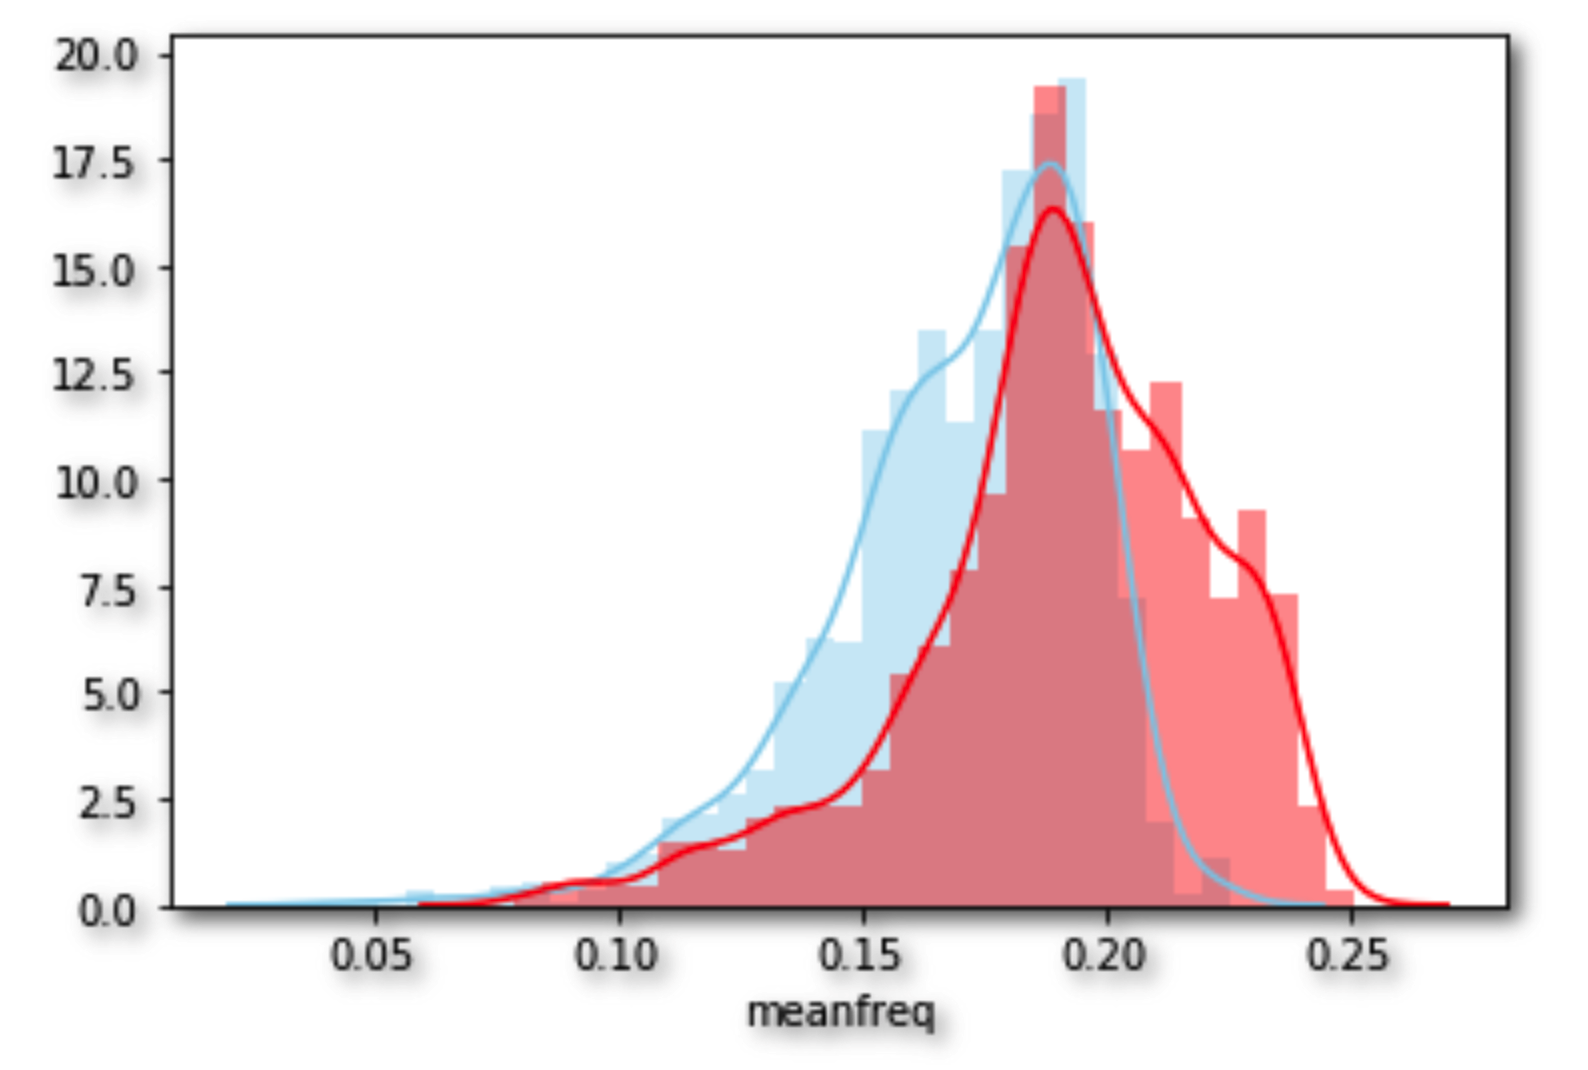


Красному цвету соответствуют данные для женских голосов, голубому — для мужских. В целом можно отметить, что распределение частот женских голосов сдвинуто вправо относительно распределения мужских.

Итак, характеристики для голосов различаются, попробуем теперь реализовать классификацию на их основе.

### Задание
Попробуйте построить модель, предсказывающую пол обладателя записи голоса.

Для этого:

Разделите выборку на обучающую и тренировочную с параметрами test_size=0.3, random_state=42.

Нормализуйте признаки с помощью функции StandardScaler(). Учитывайте, что нормализация тестовой выборки производится по среднему и отклонению тренировочной, которую мы считаем репрезентативной относительно генеральной совокупности.

Обучите модель логистической регрессии на подготовленных данных.

Пояснение
Тестовые данные не должны влиять на параметры нормализации. Нужно использовать SCALER.TRANSFORM вместо SCALER.FIT_TRANSFORM, чтобы применять параметры нормализации, рассчитанные для тренировочных данных. Иначе данные в трейне и в тесте будут нормализованы по - разному.

### Задание 4.7.1

1/1 point (graded)

Вычислите значение метрики  и введите полученное значение. Запишите ответ, округлив его до третьего знака после запятой.

In [111]:
!ls -la datasets/ml-4/voiceDataSet.csv

-rw-r--r--@ 1 obiriukov  staff  1065381  4 май 17:37 datasets/ml-4/voiceDataSet.csv


In [14]:
import pandas as pd 
import numpy as np 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

df = pd.read_csv('./datasets/ml-4/voiceDataSet.csv')
df.dropna(axis=0, inplace=True)

# целевые значения
y = df['label']

# остальные признаки, по которым будем обучать предсказывать модель целевые значения
X = df.drop(axis=1, columns=['label'])

# делим целевые и остальные параметры на выборки: для обучения и для тестирования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler=StandardScaler()
# вычисляем среднее отклоненние и среднее на тестовой выборке
scaler.fit(X_train)
# стандартизируем и нормализуем тренировочную(для обучения) тестовую выборки
X_train_norm=scaler.transform(X_train)
X_test_norm=scaler.transform(X_test)

# обучаем модель логистической регрессии на нормированных данных для обучения
logreg = LogisticRegression().fit(X_train_norm, y_train)
# предсказываем обученной моделью логистической регресиии на нормированных данных для тестирования
y_pred = logreg.predict(X_test_norm)


# вычисляем точность (accuracy) - отношение всех верно указанных ответов, ко всему количеству примеров в выборке.
accuracy = accuracy_score(y_test, y_pred)
# округляем до 3 знаков после запятой
np.round(accuracy, 3)


0.973

Теперь познакомимся с новым алгоритмом классификации, а также снова потренируемся делить выборку и осуществлять кросс-валидацию. Кроме того, посмотрим, как можно оценить качество классификации для случая, когда наша классификация не бинарная, т.е. у нас несколько классов.

В этом кейсе мы попробуем определять типы стекла по его характеристикам.

Данные можно взять здесь.
Откроем данные и увидим, что в первых столбцах показатели содержания различных веществ в стекле, а в последнем (Type) — непосредственно тип стекла.

In [28]:
import pandas as pd 
import numpy as np 


# !ls -la ./datasets/
# !mv ./datasets/glass.csv ./datasets/ml-4/

df = pd.read_csv('./datasets/ml-4/glass.csv')
df['Type'].nunique()

6

Итак, мы выяснили, сколько у нас классов и узнали, что в этот раз у нас будет не бинарная классификация. А значит, мы не сможем использовать некоторые метрики качества (например, __precision__  и __recall__ ).

Приступим непосредственно к построению модели. На примере этой задачи мы узнаем новый алгоритм kNN (метод ближайших соседей). Это один из простейших методов классификации. 

Его называют ленивым классификатором, потому что во время обучения модели он ничего не делает, просто считывает и сохраняет тренировочные данные. Сама классификация для него начинается тогда, когда ему дают тестовые данные. Тогда kNN проходит два базовых шага:

Сначала он ищет k ближайших размеченных точек данных – эти точки и называют k ближайшими соседями.
Затем, используя классы соседей, kNN решает, как лучше классифицировать новые данные. 

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold


model=KNeighborsClassifier(n_neighbors=3)
kf = KFold(n_splits=5)
cross_val_score(model, X, y, cv=kf, scoring="accuracy")

array([0.44479495, 0.5362776 , 0.67665615, 0.57503949, 0.48973144])

Если мы посмотрим на результаты классификации, то увидим достаточно большой разброс значений точности, а также в целом невысокие значения.

Это произошло в силу очень маленькой выборки в условиях большого количества классов (6 классов и около 200 наблюдений — крайне мало для получения высокого качества модели). Также плохой результат возможен по причине использования довольно простого алгоритма.

### Задание 4.7.3

1 point possible (graded)

Измените количество разбиений на 10. Вычислите среднее значение метрики  по 10 разбиениям и введите ниже, округлите до сотых.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold


model=KNeighborsClassifier(n_neighbors=10)
kf = KFold(n_splits=5)
np.round(np.mean(cross_val_score(model, X, y, cv=kf, scoring="accuracy")), 2)

0.52